In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
# Reading the dataset
data= pd.read_csv("Downloads\\Coronavirus.csv")
data.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [4]:
# Let's look at the various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
Sno               434 non-null int64
Province/State    349 non-null object
Country           434 non-null object
Last Update       434 non-null object
Confirmed         434 non-null float64
Deaths            434 non-null float64
Recovered         434 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 23.8+ KB


In [6]:
# Convert Last Update column to datetime64 format

data['Last Update'] = data['Last Update'].apply(pd.to_datetime)
data.drop(['Sno'],axis=1,inplace=True)

#Set Date column as the index column.
#data.set_index('Last Update', inplace=True)
data.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [7]:
# Countries affected

countries = data['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy']

Total countries affected by virus:  27


In [9]:
# Present Condition

from datetime import date
data_30 = data[data['Last Update'] > pd.Timestamp(date(2020,1,30))]

data_30.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
375,Hubei,Mainland China,2020-01-30 21:30:00,5806.0,204.0,116.0
376,Zhejiang,Mainland China,2020-01-30 21:30:00,537.0,0.0,9.0
377,Guangdong,Mainland China,2020-01-30 21:30:00,393.0,0.0,11.0
378,Henan,Mainland China,2020-01-30 21:30:00,352.0,2.0,3.0
379,Hunan,Mainland China,2020-01-30 21:30:00,332.0,0.0,2.0


In [10]:
# Creating a dataframe with total no of cases for every country

cases = pd.DataFrame(data_30.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,24)

global_cases = cases[['Country','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,Country,Confirmed
1,Australia,9.0
2,Cambodia,1.0
3,Canada,3.0
4,Finland,1.0
5,France,5.0
6,Germany,4.0
7,Hong Kong,12.0
8,India,1.0
9,Italy,2.0
10,Japan,11.0


In [13]:
import folium

In [44]:
# Make a data frame with dots to show on the map
world_data = pd.DataFrame({
   'name':list(global_cases['Country']),
    'lat':[-25.27,12.57,56.13,61.92,46.23,51.17,22.32,20.59,41.87,36.2,22.2,35.86,4.21,28.39,12.87,1.35,35.91,7.87,23.7,15.87,37.09,23.42,14.06,],
   'lon':[133.78,104.99,-106.35,25.75,2.21,10.45,114.17,78.96,12.56,138.25,113.54,104.19,101.98,84.12,121.77,103.82,127.77,80.77,120.96,100.99,-95.71,53.84,108.28],
   'Confirmed':list(global_cases['Confirmed']),
})

# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['lat'], world_data['lon'], world_data['Confirmed'], world_data['name']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                                                 '<strong>Confirmed Cases on 30th Jan 2020</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map
#world_map.save('countries_affected.html')

In [15]:
# A look at the different cases - confirmed, death and recovered
print('Globally Confirmed Cases: ',data_30['Confirmed'].sum())
print('Global Deaths: ',data_30['Deaths'].sum())
print('Globally Recovered Cases: ',data_30['Recovered'].sum())

Globally Confirmed Cases:  9776.0
Global Deaths:  213.0
Globally Recovered Cases:  187.0


In [16]:
# Let's look the various Provinces/States affected

data_30.groupby(['Country','Province/State']).sum()

Confirmed  Deaths  Recovered
Country        Province/State                                
Australia      New South Wales         4.0     0.0        2.0
               Queensland              3.0     0.0        0.0
               Victoria                2.0     0.0        0.0
Canada         British Columbia        1.0     0.0        0.0
               Ontario                 2.0     0.0        0.0
Germany        Bavaria                 4.0     0.0        0.0
Hong Kong      Hong Kong              12.0     0.0        0.0
Macau          Macau                   7.0     0.0        0.0
Mainland China Anhui                 237.0     0.0        3.0
               Beijing               121.0     1.0        5.0
               Chongqing             206.0     0.0        1.0
               Fujian                101.0     0.0        0.0
               Gansu                  29.0     0.0        0.0
               Guangdong             393.0     0.0       11.0
               Guangxi                87.0     0.0        2.0
               Guizhou                15.0     0.0        1.0
               Hainan                 50.0     1.0        1.0
               Hebei                  82.0     1.0        0.0
               Heilongjiang           59.0     2.0        0.0
               Henan                 352.0     2.0        3.0
               Hubei                5806.0   204.0      116.0
               Hunan                 332.0     0.0        2.0
               Inner Mongolia         20.0     0.0        0.0
               Jiangsu               168.0     0.0        2.0
               Jiangxi               240.0     0.0        7.0
               Jilin                  14.0     0.0        1.0
               Liaoning               45.0     0.0        1.0
               Ningxia                21.0     0.0        1.0
               Qinghai                 8.0     0.0        0.0
               Shaanxi                87.0     0.0        0.0
               Shandong              178.0     0.0        2.0
               Shanghai              128.0     1.0        9.0
               Shanxi                 39.0     0.0        1.0
               Sichuan               177.0     1.0        1.0
               Tianjin                32.0     0.0        0.0
               Tibet                   1.0     0.0        0.0
               Xinjiang               17.0     0.0        0.0
               Yunnan                 76.0     0.0        0.0
               Zhejiang              537.0     0.0        9.0
Taiwan         Taiwan                  9.0     0.0        0.0
US             Arizona                 1.0     0.0        0.0
               California              2.0     0.0        0.0
               Illinois                2.0     0.0        0.0
               Washington              1.0     0.0        0.0

In [17]:
# Provinces where deaths have taken place
data_30.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
Mainland China    213.0
Macau               0.0
Cambodia            0.0
Canada              0.0
Finland             0.0
Name: Deaths, dtype: float64

In [18]:
# Lets also look at the Recovered stats
data_30.groupby('Country')['Recovered'].sum().sort_values(ascending=False)[:5]

Country
Mainland China    179.0
Thailand            5.0
Australia           2.0
Japan               1.0
Taiwan              0.0
Name: Recovered, dtype: float64

In [43]:
#Mainland China
China = data_30[data_30['Country']=='Mainland China']
China.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
375,Hubei,Mainland China,2020-01-30 21:30:00,5806.0,204.0,116.0
376,Zhejiang,Mainland China,2020-01-30 21:30:00,537.0,0.0,9.0
377,Guangdong,Mainland China,2020-01-30 21:30:00,393.0,0.0,11.0
378,Henan,Mainland China,2020-01-30 21:30:00,352.0,2.0,3.0
379,Hunan,Mainland China,2020-01-30 21:30:00,332.0,0.0,2.0


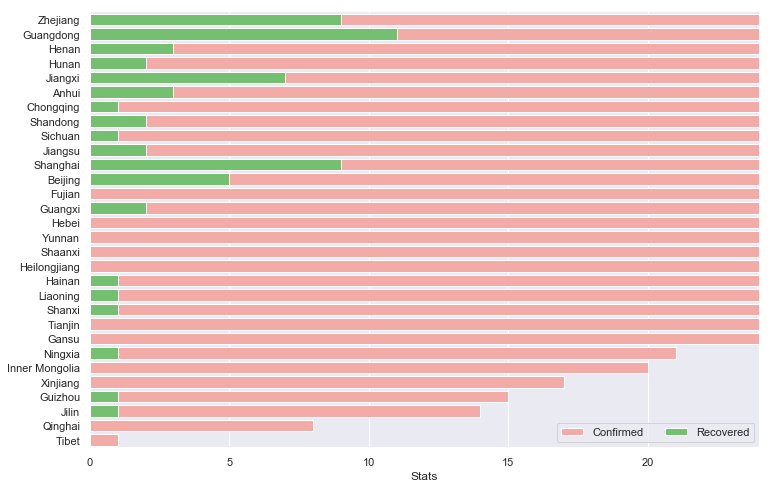

In [20]:
f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=China[1:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=China[1:],
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)